<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/EvidenceBasedInvesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the Monte Carlo Simulation notebook developed by Matt Macarty


In [0]:
# Install base libraries

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
from babel.numbers import format_currency

plots.style.use('fivethirtyeight')


In [0]:
# OBTAIN - Build Base Investment and Calculate Growth

pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(format_currency(ending, 'USD'))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [0]:
# OBTAIN - Using random variation based on market history - 7.10% - S&P 500


pv = 10000
expected_return = .071
volatility = .10
time_horizon = 30
annual_addition = 10000

#print("\tEnding Value".rjust(9))
print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(format_currency(fv, 'USD')))
    #print(format_currency(fv, 'USD') )
    pv = fv

	Return     		Ending Value
	-0.0117               	$19,883.32
	0.2698               	$35,246.86
	0.1692               	$51,208.96
	-0.0004               	$61,188.00
	0.1323               	$79,284.20
	-0.102               	$81,194.59
	0.0884               	$98,375.13
	0.0191               	$110,250.64
	0.049               	$125,648.28
	0.0628               	$143,539.38
	-0.0128               	$151,705.31
	0.1481               	$184,171.64
	-0.0666               	$181,903.94
	0.2573               	$238,714.14
	-0.0574               	$235,004.49
	0.1945               	$290,722.41
	0.0013               	$301,108.40
	-0.059               	$293,335.35
	0.2125               	$365,656.77
	0.1197               	$419,434.90
	0.0479               	$449,534.79
	0.0114               	$464,646.47
	-0.0913               	$432,209.67
	-0.1308               	$385,668.51
	0.0601               	$418,862.51
	-0.0142               	$422,899.11
	0.071               	$462,924.29
	-0.0896               	$431,

In [0]:
# MODEL - Simulate Multiple Outcomes

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .071 # Return of S&P 500 - 10 year avg
    volatility = .15 # Frequency and severity that market price fluctuates
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [0]:
# EXPLORE  - Look at sample of annual ending values

first_five = list(range(5))
sim[first_five]


,0,1,2,3,4
0,19877.70,18909.78,21823.52,23651.12,20614.96
1,34074.45,36392.40,34353.24,31976.45,36926.66
2,49746.11,38762.54,50104.06,38720.22,48483.76
3,58333.63,46177.18,60731.23,48921.04,71598.22
4,78937.80,53106.79,74835.51,78784.51,92371.05
5,95774.81,62545.60,102448.44,103005.24,106038.74
6,118476.36,63078.36,117004.28,157941.98,124779.42
7,153174.89,82401.21,116339.38,168770.86,108845.79
8,143380.32,76796.74,110159.44,207204.91,147076.78
9,143822.37,98639.56,120342.24,255422.12,119316.37


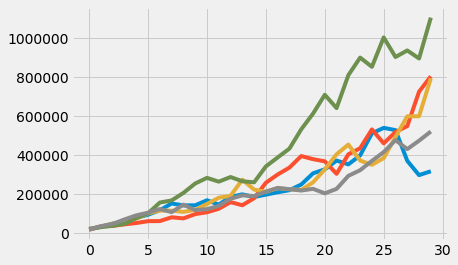

In [0]:
# EXPLORE - Plot simulated portfolios

plots.plot(sim[first_five])


In [0]:
# EXPLORE - Look at summary statistics


print("Count:", len(sim.loc[29]))
print("Mean: ", format_currency(np.mean(sim.loc[29]), 'USD'))
print("SD: ",format_currency(np.std(sim.loc[29]),'USD'))
print("Max: ",format_currency(np.max(sim.loc[29]), 'USD'))
print("Min: ", format_currency(np.min(sim.loc[29]), 'USD'))

Count: 5000
Mean:  $1,027,935.07
SD:  $613,135.63
Max:  $6,235,603.70
Min:  $155,240.95


In [0]:
# EXPLORE - Look at summary statistics with Pandas

ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.027935e+06
std      6.131970e+05
min      1.552410e+05
25%      6.095900e+05
50%      8.791216e+05
75%      1.269254e+06
max      6.235604e+06
Name: 29, dtype: float64

(array([  9.,  59.,  83., 165., 236., 273., 301., 288., 289., 299., 277.,
        242., 256., 215., 206., 170., 162., 167., 147., 121., 115.,  76.,
         90.,  78.,  68.,  56.,  59.,  40.,  48.,  45.,  37.,  35.,  20.,
         31.,  22.,  18.,  19.,  20.,  16.,  10.,  12.,   8.,   4.,  12.,
         15.,  13.,   3.,   8.,   4.,   6.,   2.,   5.,   1.,   1.,   3.,
          2.,   3.,   4.,   1.,   2.,   1.,   2.,   1.,   1.,   3.,   0.,
          2.,   3.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]), array([ 155240.95  ,  216044.5775,  276848.205 ,  337651.8325,
         398455.46  ,  459259.0875,  520062.715 ,  580866.3425,
         641669.97  ,  702473.5975,  763277.225 ,  824080.8525,
         884884.48  ,  945688.1075, 1006491.735 , 1067295.3625,
        1128098.99  , 1188902.6175, 1249706.245 , 1310509.8725,

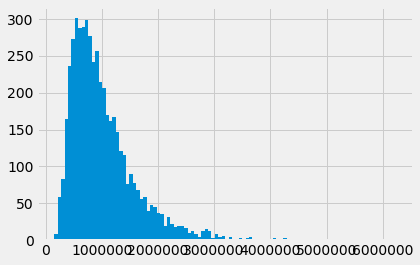

In [0]:
# EXPLORE - Look at histogram

plots.hist(ending_values, bins=100)


In [0]:
# ANALYZE - Probability of seeing greater than a specific value?

len(ending_values[ending_values>1000000]) / len(ending_values)


0.4068

In [0]:
# ANALYZE - Tableof all percentiles


p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(format_currency(p_tiles[p], 'USD')))

       5%-ile:  $376,638.65
      10%-ile:  $445,581.47
      15%-ile:  $503,165.82
      25%-ile:  $609,590.01
      75%-ile:  $1,269,254.46
      85%-ile:  $1,557,638.74
      90%-ile:  $1,778,164.51
      95%-ile:  $2,192,723.03
